In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
train = pd.read_csv('C:/Users/Margo/Downloads/train.csv')
test = pd.read_csv('C:/Users/Margo/Downloads/test.csv')
train_test_data = [train, test]    # Предобработка будет выполняться на объединённых данных

In [7]:
print("Full train dataset shape is {}".format(train.shape))
train.head(10)

Full train dataset shape is (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported'>

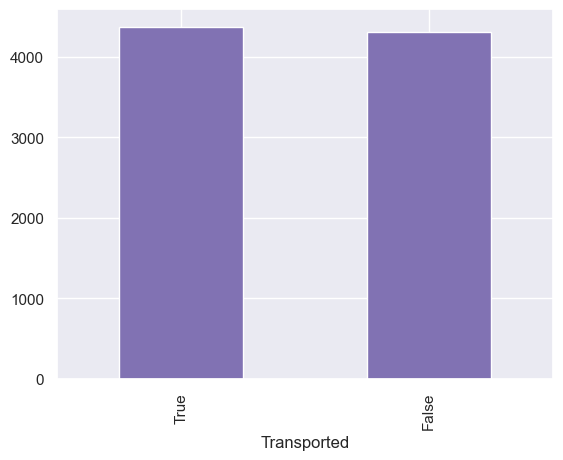

In [9]:
plot_df = train.Transported.value_counts()
print(plot_df)
plot_df = train.Transported.value_counts()
plot_df.plot(kind="bar", color = 'm')

In [10]:
test_passenger_ids = test['PassengerId'].copy()    # Сохраняем Id пассажиров для формирования итогового файла
for dataset in train_test_data:
    dataset = dataset.drop(['PassengerId', 'Name'], axis=1, inplace=True)    # Эти признаки нам не важны

In [11]:
combined_data = pd.concat([train, test], ignore_index=True)    # "Склеиваем" train и test
combined_data.isnull().sum().sort_values(ascending=False)    # Анализируем пропущенные данные

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64

In [12]:
most_frequent_cabin = pd.concat([train['Cabin'], test['Cabin']]).mode()[0]    # Заполняем пропуски в 'Cabin'
train['Cabin'] = train['Cabin'].fillna(most_frequent_cabin)
test['Cabin'] = test['Cabin'].fillna(most_frequent_cabin)

train[["Deck", "Cabin_num", "Side"]] = train["Cabin"].str.split("/", expand=True)    # Разбиваем 'Cabin' на составляющие признаки
test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)

train['Cabin_num'] = pd.to_numeric(train['Cabin_num'])    # Переводим 'Cabin_num' в числа
test['Cabin_num'] = pd.to_numeric(test['Cabin_num'])

train.drop('Cabin', axis=1, inplace=True)    # Удаляем исходный признак 'Cabin'
test.drop('Cabin', axis=1, inplace=True)

for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].fillna(pd.concat([train['Age'], test['Age']]).median())    # Заполняем медианами для сохранения распределения данных
    dataset['VIP'] = dataset['VIP'].astype(object).fillna(False).astype(int)    # Заполняем пропуски и переводим в число
    dataset['CryoSleep'] = dataset['CryoSleep'].astype(object).fillna(False).astype(int)

    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Unknown')   # Создаем категорию 'Unknown' для пропусков
    dataset['Destination'] = dataset['Destination'].fillna('Unknown')
    dataset['Deck'] = dataset['Deck'].fillna('Unknown')
    dataset['Side'] = dataset['Side'].fillna('Unknown')
    
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Side']    # Кодируем категориальные признаки
for feature in categorical_features:
    le = LabelEncoder()
    combined_data = pd.concat([train[feature], test[feature]])
    le.fit(combined_data)
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])

numeric_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']    # Заполняем пропуски в числовых признаках
for feature in numeric_features:
    median_value = pd.concat([train[feature], test[feature]]).median()
    train[feature] = train[feature].fillna(median_value)
    test[feature] = test[feature].fillna(median_value)

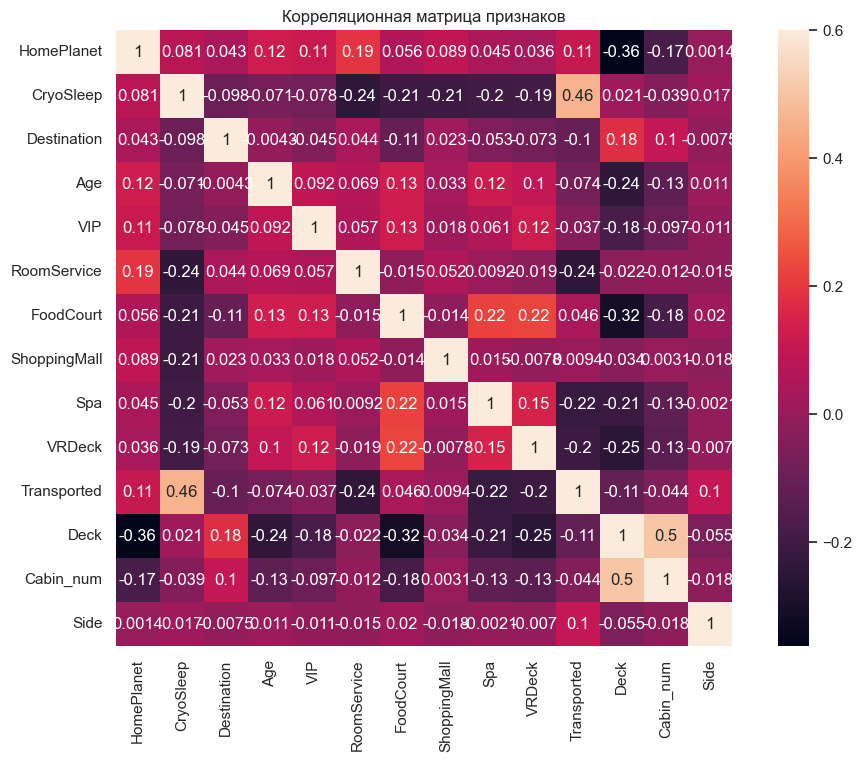

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, vmax=0.6, square=True, annot=True)
plt.title('Корреляционная матрица признаков')
plt.show()

In [14]:
train.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1
5,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,True,5,0,0
6,0,0,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,True,5,2,1
7,0,1,2,28.0,0,0.0,0.0,0.0,0.0,0.0,True,6,0,1
8,0,0,2,35.0,0,0.0,785.0,17.0,216.0,0.0,True,5,3,1
9,1,1,0,14.0,0,0.0,0.0,0.0,0.0,0.0,True,1,1,0


In [15]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',         # Выбираем признаки для обучения модели
            'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'Deck', 'Side']
# Разделяем данные на обучающие и тестовые наборы
X_train = train[features]    
y_train = train['Transported']
X_test = test[features]

# Создаём и обучаем модель Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred_random_forest = clf.predict(X_test)    # Предсказание на тестовых данных
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print(f"Accuracy Random Forest: {acc_random_forest}%")

Accuracy Random Forest: 94.8%


In [16]:
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,  # Используем сохраненные ID
    'Transported': y_pred_random_forest.astype(bool)  # Уже готовые предсказания
})

submission_df.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
